# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [38]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [39]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head(10)


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


## Deliverable 1: Get a Summary DataFrame 

In [40]:
#  1. Get the total rides for each city type
summary_df = pyber_data_df.groupby(["type"])[["ride_id"]].count()
summary_df.rename({'ride_id': 'Total Rides'}, axis=1, inplace=True)


In [41]:
# 2. Get the total drivers for each city type
summary_df["Total Drivers"] = city_data_df.groupby(["type"])["driver_count"].sum()

In [42]:
#  3. Get the total amount of fares for each city type
summary_df["Total Fares"] = pyber_data_df.groupby(["type"])["fare"].sum()
summary_df

,Total Rides,Total Drivers,Total Fares
type,,,
Rural,125,78,4327.93
Suburban,625,490,19356.33
Urban,1625,2405,39854.38


In [43]:
#  4. Get the average fare per ride for each city type. 
summary_df["Average Fare Per Ride"] = pyber_data_df.groupby(["type"])["fare"].sum() / summary_df["Total Rides"]
summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride
type,,,,
Rural,125,78,4327.93,34.623440
Suburban,625,490,19356.33,30.970128
Urban,1625,2405,39854.38,24.525772


In [44]:
# 5. Get the average fare per driver for each city type. 
summary_df["Average Fare Per Driver"] = pyber_data_df.groupby(["type"])["fare"].sum() / summary_df["Total Drivers"]
summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [45]:
#  6. Create a PyBer summary DataFrame. 
summary_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, Rural to Urban
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Total Rides              3 non-null      int64  
 1   Total Drivers            3 non-null      int64  
 2   Total Fares              3 non-null      float64
 3   Average Fare Per Ride    3 non-null      float64
 4   Average Fare Per Driver  3 non-null      float64
dtypes: float64(3), int64(2)
memory usage: 144.0+ bytes


In [46]:
#  7. Cleaning up the DataFrame. Delete the index name
summary_df.index.name = None
summary_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, Rural to Urban
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Total Rides              3 non-null      int64  
 1   Total Drivers            3 non-null      int64  
 2   Total Fares              3 non-null      float64
 3   Average Fare Per Ride    3 non-null      float64
 4   Average Fare Per Driver  3 non-null      float64
dtypes: float64(3), int64(2)
memory usage: 144.0+ bytes


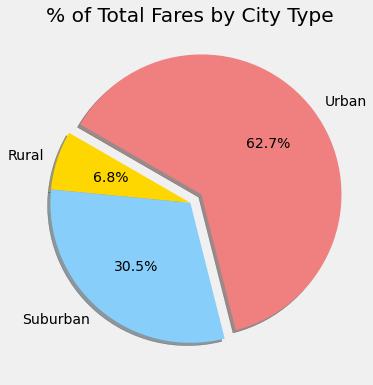

In [61]:
# creating a pie chart based off profit per type
import matplotlib as mpl
plt.subplots(figsize=(10, 6))
plt.pie(summary_df["Total Fares"],
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig7.png")
# Show Figure
plt.show()

In [10]:
#  8. Format the columns.
summary_df['Total Fares'] = summary_df['Total Fares'].map('${:,.2f}'.format)
summary_df['Average Fare Per Ride'] = summary_df['Average Fare Per Ride'].map('${:,.2f}'.format)
summary_df['Average Fare Per Driver'] = summary_df['Average Fare Per Driver'].map('${:,.2f}'.format)
summary_df["Total Rides"] = summary_df["Total Rides"].map('{:,.0f}'.format)
summary_df["Total Drivers"] = summary_df["Total Drivers"].map('{:,.0f}'.format)
summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# 1. Read the merged DataFrame
pyber_data_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


In [12]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
fare_df = pyber_data_df.groupby(["type","date"])["fare"].sum()

In [13]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
fare_df = fare_df.reset_index()

In [14]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
fare_df = fare_df.pivot(index = "date" , columns = "type" , values = "fare")


In [15]:
fare_df.index

Index(['2019-01-01 00:08:16', '2019-01-01 00:46:46', '2019-01-01 02:07:24',
       '2019-01-01 03:46:50', '2019-01-01 05:23:21', '2019-01-01 09:45:36',
       '2019-01-01 12:32:48', '2019-01-01 14:40:14', '2019-01-01 14:42:25',
       '2019-01-01 14:52:06',
       ...
       '2019-05-07 20:05:15', '2019-05-07 20:22:19', '2019-05-07 20:40:29',
       '2019-05-08 01:54:18', '2019-05-08 02:31:25', '2019-05-08 04:20:00',
       '2019-05-08 04:39:49', '2019-05-08 07:29:01', '2019-05-08 11:38:35',
       '2019-05-08 13:10:18'],
      dtype='object', name='date', length=2375)

In [16]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
#fare_df.date = pd.to_datetime(fare_df.date)
print(fare_df.info())
df = fare_df.loc["2019-01-01":"2019-04-29"]
df

<class 'pandas.core.frame.DataFrame'>
Index: 2375 entries, 2019-01-01 00:08:16 to 2019-05-08 13:10:18
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     125 non-null    float64
 1   Suburban  625 non-null    float64
 2   Urban     1625 non-null   float64
dtypes: float64(3)
memory usage: 74.2+ KB
None


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [17]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8
df.index = pd.to_datetime(df.index)

In [18]:
# 7. Check that the datatype for the index is datetime using df.info()
df.info()
df

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [19]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
df = df.resample('W').sum()
df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


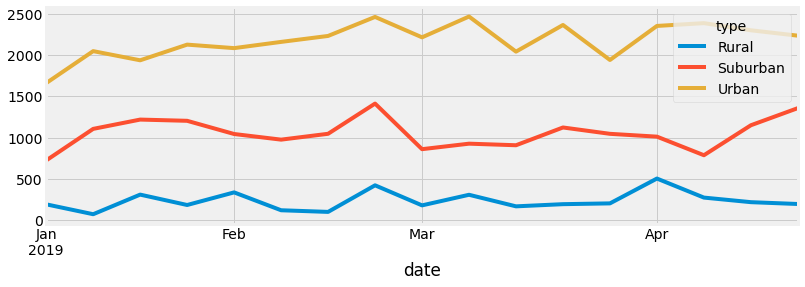

In [59]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
df.plot(figsize=(12,4))
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
plt.style.use('fivethirtyeight')

plt.savefig("analysis/fig8.png")